# Preparing the environment

## Graphics and plotting

The following block of code initializes the Python plotting library [matplotlib](http://matplotlib.org/gallery.html) and configures it to show figures embedded in the notebook (as opposed to opening a new window for each figure):

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Set the default size and style of the plot.  (Plots are styled to [look like R's `ggplot`](http://tonysyu.github.io/mpltools/auto_examples/style/plot_ggplot.html) library.)

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 9)

## SQL database connection

The ESC493 VM comes preinstalled with [Catherine Devlin's `%sql`-magic for IPython][1]; this allows you to run SQL queries from the IPython notebook, and intermix them with Python code.

[1]: https://github.com/catherinedevlin/ipython-sql

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code

In [3]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement (the `rmurri@/lustre` syntax means "connect to the PostGreSQL DB named `lustre` running on *this* host as user `rmurri`" -- of course change `rmurri` to *your* user name):

In [4]:
%sql postgresql://rmurri@/lustre


u'Connected: rmurri@lustre'

Now you can run 1-line SQL queries by prefixing them with `%sql` or multi-line ones with `%%sql`

# Exploring the dataset

In [5]:
%sql select * from lustre limit 5;

5 rows affected.


usr,grp,atime,mtime,blksize,size,path
us321,econ,1363100458,1363100620,4,342,/scratch/econ/H2/preprocessing/long.txt
us321,econ,1363100458,1363100620,4,348,/scratch/econ/H2/preprocessing/short.txt
us321,econ,1363100458,1363100620,4,696,/scratch/econ/H2/preprocessing/slist.txt
us321,econ,1363174233,1363174233,16,16135,/scratch/econ/H2/preprocessing/SNS_SSC_008_batch.mat
us321,econ,1363174233,1363174233,16,16142,/scratch/econ/H2/preprocessing/SNS_SSC_009_batch.mat


The `%sql` "magic" can also be used as an expression: it returns the result table as a Python `list` of tuples:

In [6]:
result = %sql select size, count(path) from lustre group by size order by size asc limit 100;

100 rows affected.


Now the `result` list can be used in code as if we had defined it in Python directly:

In [7]:
result[:5]

[(0L, 252929L), (1L, 334L), (2L, 379L), (3L, 100L), (4L, 753L)]

## Plotting results

In order to plot results, we need to have separate lists/arrays for the X-axis values and the corresponding Y-axis values.


Python's `zip` function is used to split the result table into independent lists (all first elements, all second elements):

In [8]:
sizes, occurrences = zip(*result)

In [9]:
sizes[:5], occurrences[:5]

((0L, 1L, 2L, 3L, 4L), (252929L, 334L, 379L, 100L, 753L))

The `plt.plot()` function is used to make a line plot; here we show how to place "sizes" on the X-axis and "occurrences" on the Y-axis:

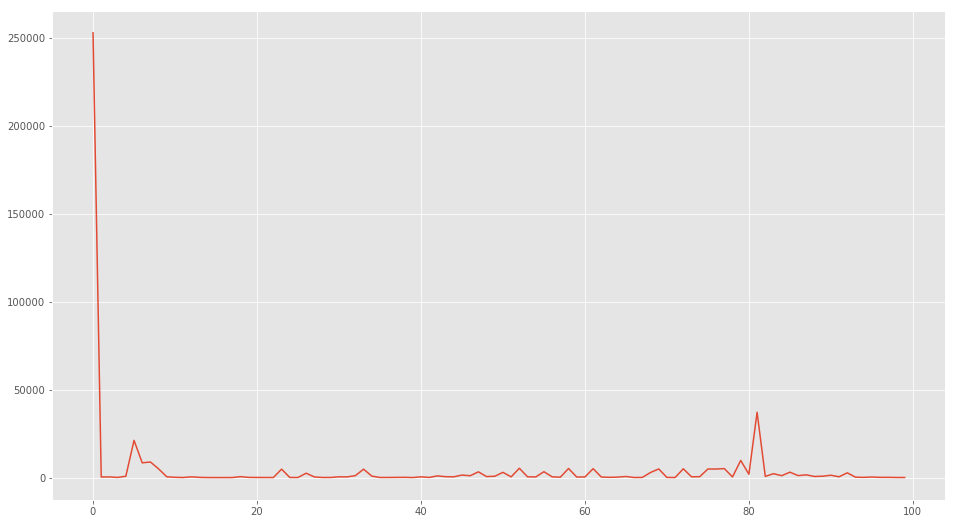

In [10]:
plt.plot(sizes, occurrences)